<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [24]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<h1>Project Tasks:</h1>

<h2>Task 1: Familiarize yourself with the dataset</h2>

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [25]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<h2>Task 2: Generate basic statistics and visualizations for upper management.</h2>


In [21]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<strong>For all visualizations, please include a title in each graph and appropriate labels</strong>
<h3>Generate the following and explain your findings:</h3>

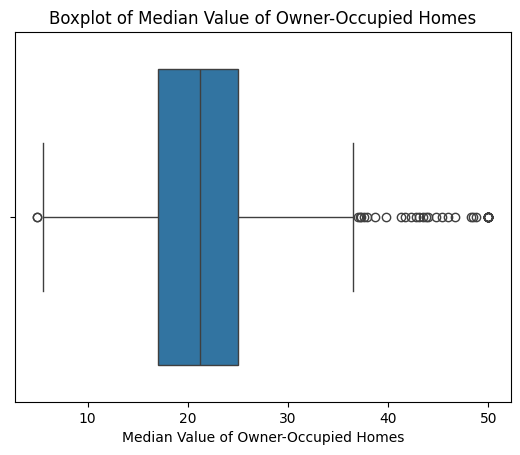


The boxplot shows the distribution of the median value of owner-occupied homes in the Boston housing dataset. 
The box represents the interquartile range (IQR), with the line inside the box indicating the median. 
The "whiskers" extend to show the range of the data, excluding outliers, which are represented as individual points outside the whiskers. 
The presence of outliers suggests that there are some homes with significantly higher or lower values compared to the rest of the dataset.
The median value of homes is around 22, with a few outliers on the higher end, indicating that while most homes are valued around this median, there are some homes with much higher values. 
This could be due to various factors such as location, size, and amenities.
The boxplot is a useful visualization for understanding the spread and skewness of the data, as well as identifying potential outliers that may need further investigation.



In [34]:
# For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.xlabel('Median Value of Owner-Occupied Homes')
pyplot.show()
description="""
The boxplot shows the distribution of the median value of owner-occupied homes in the Boston housing dataset. 
The box represents the interquartile range (IQR), with the line inside the box indicating the median. 
The "whiskers" extend to show the range of the data, excluding outliers, which are represented as individual points outside the whiskers. 
The presence of outliers suggests that there are some homes with significantly higher or lower values compared to the rest of the dataset.
The median value of homes is around 22, with a few outliers on the higher end, indicating that while most homes are valued around this median, there are some homes with much higher values. 
This could be due to various factors such as location, size, and amenities.
The boxplot is a useful visualization for understanding the spread and skewness of the data, as well as identifying potential outliers that may need further investigation.
"""
print(description)

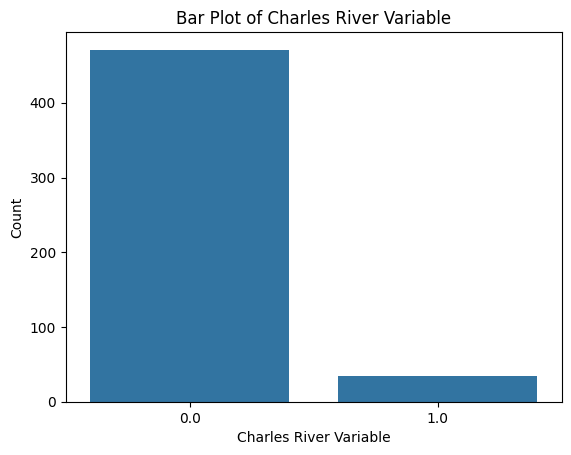


The Charles River variable is a binary variable indicating whether the property is located near the Charles River (1) or not (0). 
The bar plot shows the count of properties in each category. 
The majority of properties are not located near the river, as indicated by the higher count for the 0 category.
The count of properties located near the river (1) is significantly lower, indicating that only a small portion of the properties in the dataset are situated near the Charles River. 
This could be an important factor to consider when analyzing property values, as proximity to natural features can influence real estate prices.
The boxplot for the median value of owner-occupied homes (MEDV) shows the distribution of home prices in the Boston area. 
The median value is represented by the line inside the box, while the interquartile range (IQR) is represented by the box itself. 
The whiskers extend to show the range of values within 1.5 times the IQR from the lower and upper quartiles. 
An

In [35]:
#Provide a bar plot for the Charles river variable
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('Charles River Variable')
pyplot.ylabel('Count')
pyplot.show()
description="""
The Charles River variable is a binary variable indicating whether the property is located near the Charles River (1) or not (0). 
The bar plot shows the count of properties in each category. 
The majority of properties are not located near the river, as indicated by the higher count for the 0 category.
The count of properties located near the river (1) is significantly lower, indicating that only a small portion of the properties in the dataset are situated near the Charles River. 
This could be an important factor to consider when analyzing property values, as proximity to natural features can influence real estate prices.
The boxplot for the median value of owner-occupied homes (MEDV) shows the distribution of home prices in the Boston area. 
The median value is represented by the line inside the box, while the interquartile range (IQR) is represented by the box itself. 
The whiskers extend to show the range of values within 1.5 times the IQR from the lower and upper quartiles. 
Any points outside this range are considered outliers and are plotted as individual points.
The boxplot indicates that the median value of homes is around 22, with a few outliers on the higher end. 
The distribution appears to be right-skewed, indicating that there are some high-value properties that may be influencing the overall median. The presence of outliers suggests that there are properties with significantly higher values than the majority of the dataset.
"""
print(description)


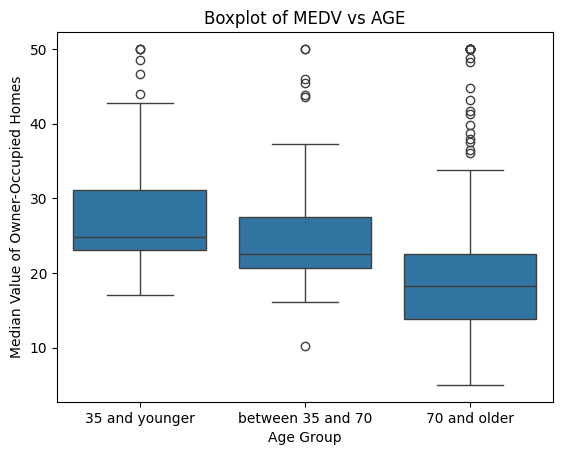


The boxplot shows the distribution of the median value of owner-occupied homes (MEDV) across three age groups: 35 and younger, between 35 and 70, and 70 and older. 
The boxplot displays the median, quartiles, and potential outliers for each age group. 
The median value of homes appears to be highest in the "between 35 and 70" age group, while the "35 and younger" group has the lowest median value. 
The "70 and older" group has a wider range of values, indicating more variability in home prices for that age group.
The boxplot provides a visual representation of the differences in home values across these age groups, highlighting the potential impact of age on housing prices in the Boston area.



In [36]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
# COPY_boston_df = boston_df.copy()
# COPY_boston_df['AGE'] = pd.cut(COPY_boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', 'between 35 and 70', '70 and older'])
sns.boxplot(x=COPY_boston_df['AGE'], y=COPY_boston_df['MEDV'])
pyplot.title('Boxplot of MEDV vs AGE')
description="""
The boxplot shows the distribution of the median value of owner-occupied homes (MEDV) across three age groups: 35 and younger, between 35 and 70, and 70 and older. 
The boxplot displays the median, quartiles, and potential outliers for each age group. 
The median value of homes appears to be highest in the "between 35 and 70" age group, while the "35 and younger" group has the lowest median value. 
The "70 and older" group has a wider range of values, indicating more variability in home prices for that age group.
The boxplot provides a visual representation of the differences in home values across these age groups, highlighting the potential impact of age on housing prices in the Boston area.
"""
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Owner-Occupied Homes')
pyplot.show()
print(description)


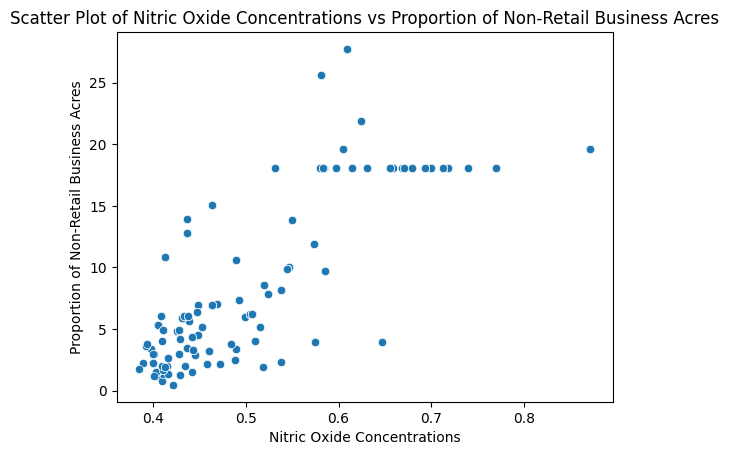

 
The scatter plot shows the relationship between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
The x-axis represents the Nitric Oxide concentrations, while the y-axis represents the proportion of non-retail business acres.



In [38]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
pyplot.xlabel('Nitric Oxide Concentrations')
pyplot.ylabel('Proportion of Non-Retail Business Acres')
description = """ 
The scatter plot shows the relationship between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
The x-axis represents the Nitric Oxide concentrations, while the y-axis represents the proportion of non-retail business acres.
"""
pyplot.show()
print(description)

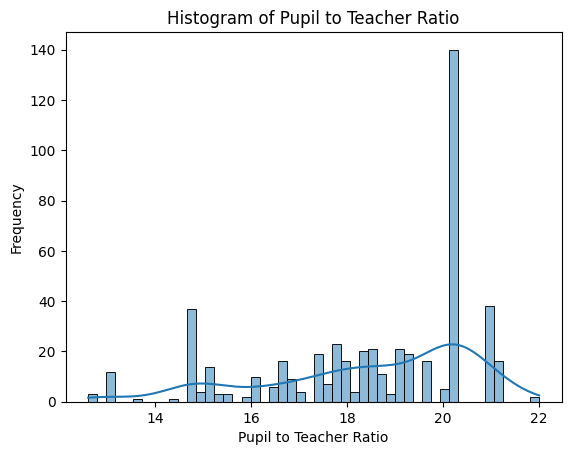


This histogram shows the distribution of the pupil to teacher ratio in the Boston housing dataset. 
The x-axis represents the pupil to teacher ratio, while the y-axis represents the frequency of each ratio. 
The histogram is overlaid with a kernel density estimate (KDE) curve, which provides a smoothed representation of the distribution.



In [37]:
#Create a histogram for the pupil to teacher ratio variable
sns.histplot(boston_df['PTRATIO'], bins=50, kde=True)
pyplot.title('Histogram of Pupil to Teacher Ratio')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()
description = """
This histogram shows the distribution of the pupil to teacher ratio in the Boston housing dataset. 
The x-axis represents the pupil to teacher ratio, while the y-axis represents the frequency of each ratio. 
The histogram is overlaid with a kernel density estimate (KDE) curve, which provides a smoothed representation of the distribution.
"""
print(description)

<h2>Task 3: Use the appropriate tests to answer the questions provided.</h2>

For each of the following questions;

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [50]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr, shapiro
from scipy.stats import ttest_ind

In [40]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

"""SPLIT DATA:"""
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Houses bounded by the river
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Houses not bounded

t_stat, p_value = ttest_ind(medv_chas_1, medv_chas_0, equal_var=False)  # Use Welch's t-test (no equal variance assumption)

mean_chas_1 = medv_chas_1.mean()
mean_chas_0 = medv_chas_0.mean()
median_chas_1 = medv_chas_1.median()
median_chas_0 = medv_chas_0.median()

# Print interpreted results
print(f"""
T-test for Difference in Median House Values by Charles River Proximity:
- Groups Compared: Houses bounded by the Charles River (CHAS = 1) vs. not bounded (CHAS = 0)
- Mean Value (Bounded): ${mean_chas_1:.2f} thousand
- Mean Value (Not Bounded): ${mean_chas_0:.2f} thousand
- Median Value (Bounded): ${median_chas_1:.2f} thousand
- Median Value (Not Bounded): ${median_chas_0:.2f} thousand
- T-statistic: {t_stat:.3f}
- P-value: {p_value:.4f}
- Conclusion: {'There is a significant difference' if p_value < 0.05 else 'There is no significant difference'} 
  in median house values between houses bounded and not bounded by the Charles River 
  (p-value {'<' if p_value < 0.05 else '>'} 0.05).
""")


T-test for Difference in Median House Values by Charles River Proximity:
- Groups Compared: Houses bounded by the Charles River (CHAS = 1) vs. not bounded (CHAS = 0)
- Mean Value (Bounded): $28.44 thousand
- Mean Value (Not Bounded): $22.09 thousand
- Median Value (Bounded): $23.30 thousand
- Median Value (Not Bounded): $20.90 thousand
- T-statistic: 3.113
- P-value: 0.0036
- Conclusion: There is a significant difference 
  in median house values between houses bounded and not bounded by the Charles River 
  (p-value < 0.05).



In [48]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#boston_df['MEDV'] = boston.target
#bins = [0, 33.33, 66.66, 100]  # Roughly terciles or meaningful cutoffs
#labels = ['Low (0–33.33)', 'Medium (33.33–66.66)', 'High (66.66–100)']
#boston_df['AGE_cat'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)
#print("Distribution of AGE categories:")
#print(boston_df['AGE_cat'].value_counts())
#desc_stats = boston_df.groupby('AGE_cat')['MEDV'].agg(['mean', 'median']).round(2)
#print("\nDescriptive Statistics for MEDV by AGE Category:")
#print(desc_stats)

model = ols('MEDV ~ C(AGE)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)


"""KEY RESULTS:"""
#f_stat = anova_table['F']['C(AGE_cat)']
#p_value = anova_table['PR(>F)']['C(AGE_cat)']


"""SUMMARY:"""
print(anova_table)

                sum_sq     df         F   PR(>F)
C(AGE)    29884.038419  355.0  0.984009  0.55397
Residual  12832.256996  150.0       NaN      NaN


In [52]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Pearson correlation: {correlation} \n with associated probability: {p_value}')

# Check normality assumption (optional, for Pearson correlation)
nox_norm_p = shapiro(boston_df['NOX'])[1]
indus_norm_p = shapiro(boston_df['INDUS'])[1]

# Interpret correlation strength
def correlation_strength(corr):
    corr = abs(corr)
    if corr < 0.1:
        return "negligible"
    elif corr < 0.3:
        return "weak"
    elif corr < 0.5:
        return "moderate"
    elif corr < 0.7:
        return "strong"
    else:
        return "very strong"
    
correlation_strength(correlation)

Pearson correlation: 0.763651446920915 
 with associated probability: 7.913361061241532e-98


'very strong'

In [49]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

model = ols('MEDV ~ DIS', data=boston_df).fit()

"""KEY RESULTS:"""
coef = model.params['DIS']
p_value = model.pvalues['DIS']
r_squared = model.rsquared

print(f"""
Impact of Weighted Distance to Employment Centers on Median Home Value:
- A one-unit increase in weighted distance (DIS) to the five Boston employment centers
  is associated with a ${coef:.2f} thousand change in the median value of owner-occupied homes.
- Statistical significance: {'Significant' if p_value < 0.05 else 'Not significant'} (p-value = {p_value:.4f}).
- Model fit: The model explains {r_squared*100:.1f}% of the variance in median home values (R-squared = {r_squared:.3f}).
- Note: This simple regression does not account for other factors that may influence home values.
""")

"""SUMMARY:"""
print(model.summary())



Impact of Weighted Distance to Employment Centers on Median Home Value:
- A one-unit increase in weighted distance (DIS) to the five Boston employment centers
  is associated with a $1.09 thousand change in the median value of owner-occupied homes.
- Statistical significance: Significant (p-value = 0.0000).
- Model fit: The model explains 6.2% of the variance in median home values (R-squared = 0.062).
- Note: This simple regression does not account for other factors that may influence home values.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 19 May 2025   Prob (F-statistic):           1.21e-08
Time:                        18:13:33   Log-Likelihood:                -1823.9
No. Observations:    

<h2>Task 4: Share your Jupyter Notebook.</h2>